In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

from matplotlib.ticker import AutoMinorLocator, FormatStrFormatter
from os import path
import h5py
import sys

In [8]:
pd.set_option('display.max_columns', None)  
sns.set_style('ticks')
# plt.rc('text', usetex=True)
# plt.rc('text.latex', preamble=r'\usepackage{pifont} \usepackage{tikz} \usepackage[utf8]{inputenc}')
# plt.rc('text.latex', preamble=r'\usepackage[utf8]{inputenc}')
plt.rc('font', family='Times')
sns.set_context("notebook", font_scale=1.5)
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 28

# Initializing System

In [2]:
SystName    = ['N3_NASA']
Molecules = ['N2']
Atoms = ['N']
Box_Header  = ['time','N','N2','Temp','Density','Pressure','NbPart','Energy']
NbProcesses = 3

# Initializing Paths

In [3]:
Dimension   = 'transfer'
InelRunNb   = 4
ExchRunNb   = 4
DissRunNb   = 55
ReactionFlgQCT = '1_1_1_0'
ReactionFlg = '1_100_100_0'
TempVec = [10000]

Workspace_path = '/home/venturi/WORKSPACE/'
Surqct_path    = Workspace_path + 'SurQCT/'
CoarseAir_path = Workspace_path + 'CoarseAIR/coarseair/dtb/Molecules/'
PathToHDF5Fld  = Workspace_path + 'Air_Database/HDF5_Database/'
QCT_ME_path    = Workspace_path + 'Air_Database/Run_0D_semi/'
SurQCT_ME_path = Workspace_path + 'Air_Database/Run_0D_surQCT/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
Data_ME_path   = Surqct_path + '0D/Data/' + System[0] + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
Figure_ME_path = Surqct_path + '0D/Figures/' + System[0] + '/' + Dimension + '_RunI'+str(InelRunNb)+'_E'+str(ExchRunNb)+'_D'+str(DissRunNb)+'/'
PathToDiatFile = [CoarseAir_path+Molecules[0]+'/LeRoy/MyLeroy_FromRobyn.inp']

print('QCT Master Equation Path    :', QCT_ME_path)
print('SurQCT Master Equation Path :', SurQCT_ME_path)
print('Data Master Equation Path   :', Data_ME_path)
print('Figures Master Equation Path:', Figure_ME_path)

QCT Master Equation Path    : /home/venturi/WORKSPACE/Air_Database/Run_0D_semi/
SurQCT Master Equation Path : /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/transfer_RunI4_E4_D55/
Data Master Equation Path   : /home/venturi/WORKSPACE/SurQCT/0D/Data/N3_NASA/transfer_RunI4_E4_D55/
Figures Master Equation Path: /home/venturi/WORKSPACE/SurQCT/0D/Figures/N3_NASA/transfer_RunI4_E4_D55/


# Reading Master Equation Solution Files

In [4]:
QCT=[]
SurQCT=[]

for Temp in TempVec:
    
    FileName=QCT_ME_path+'output_'+System[0]+'_T'+str(Temp)+'K_'+ReactionFlgQCT+'/box.dat'
    QCTTemp=pd.read_csv(FileName,delimiter='  ')
    QCTTemp.columns = Box_Header
    QCT.append(QCTTemp)
    
    FileName=SurQCT_ME_path+'output_'+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'/box.dat'
    SurQCTTemp=pd.read_csv(FileName,delimiter='  ')
    SurQCTTemp.columns = Box_Header
    SurQCT.append(SurQCTTemp)


<ipython-input-4-82afa103abe4>:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  QCTTemp=pd.read_csv(FileName,delimiter='  ')
<ipython-input-4-82afa103abe4>:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  SurQCTTemp=pd.read_csv(FileName,delimiter='  ')


# Read Diatomic Properties and Rates

In [5]:
# Import Reading Functions
sys.path.insert(0, Surqct_path  + '/surqct/scripts/Paper_figures/')
from Reading import read_diatdata, read_Rates

# Read Diatomic Potentials
NMolecules = len(Molecules)
DiatData   = []
NLevels    = []

for iMol in range(NMolecules):
    DiatDataTemp = read_diatdata(PathToDiatFile[iMol], Molecules[iMol], TempVec)
    DiatData.append(DiatDataTemp)
    
# Read Rates
PathToHDF5File = PathToHDF5Fld+System[0]+'.hdf5'
KDiss, KInelMat, KExchMat, MoleculeData = read_Rates(PathToHDF5File, Molecules[0], Temp, Temp, NbProcesses)

[HCN]:   Reading Molecular Levels Data from: /home/venturi/WORKSPACE/CoarseAIR/coarseair/dtb/Molecules/N2/LeRoy/MyLeroy_FromRobyn.inp
[HCN]:   Reading Rates Data from: /home/venturi/WORKSPACE/Air_Database/HDF5_Database/N3_NASA.hdf5
<HDF5 group "/N2" (21 members)>


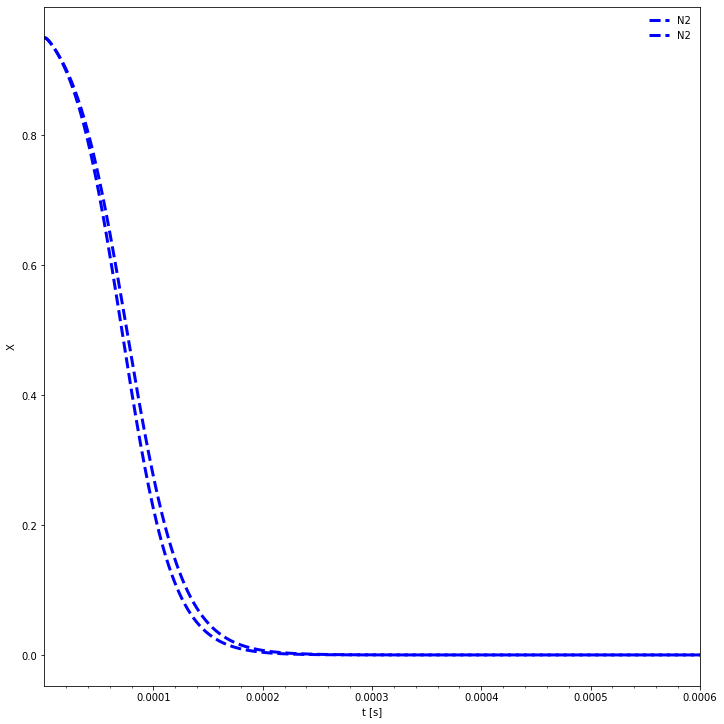

In [6]:
for iTemp in range(1):
    Temp = TempVec[iTemp]
    # CNH
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    plt.plot(QCT[iTemp].time, QCT[iTemp].N2, '--b', label='N2',linewidth=3)
    plt.plot(SurQCT[iTemp].time, SurQCT[iTemp].N2, '--b', label='N2',linewidth=3)
    
    plt.legend(frameon=False)
    plt.xscale('linear')
    plt.xlabel('t [s]')
    plt.ylabel('X')
    plt.xlim([1e-9,6e-4])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    fig.tight_layout(pad=0.5)
#     plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)

# Reading Populations

In [7]:
from Reading import read_pops

# Reading Populations
PopQCT = []
PopSurQCT = []
Molecule = pd.DataFrame()
Molecule.NLevels=9399 #np.size(DiatData[0]['EInt'].to_numpy())

for iTemp in range(len(TempVec)):
    Temp = TempVec[iTemp]

    # QCT
    PopFilePath=QCT_ME_path+'output_'+System[0]+'_T'+str(Temp)+'K_'+ReactionFlgQCT
    PopTempQCT=read_pops(PopFilePath,Molecules[0],QCT[iTemp].time)
    PopQCT.append(PopTempQCT)
    
    # SurQCT
    PopFilePath=SurQCT_ME_path+'output_'+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg
    PopTempSurQCT=read_pops(PopFilePath,Molecules[0],SurQCT[iTemp].time)
    PopSurQCT.append(PopTempSurQCT)
    

[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_semi/output_N3_NASA_T10000K_1_1_1_0
[Master Equation]:   Reading Population Data from: /home/venturi/WORKSPACE/Air_Database/Run_0D_surQCT/transfer_RunI4_E4_D55/output_N3_NASA_T10000K_1_100_100_0


In [10]:
for iTemp in range(len(TempVec)):

#     # QCT
#     PopQCT[iTemp].Pop_g=np.reshape(PopQCT[iTemp].PopTemp.to_numpy(),(np.size(QCT[iTemp].time)+1,9399))
#     # SurQCT
#     PopSurQCT[iTemp].Pop_g=np.reshape(PopSurQCT[iTemp].PopTemp.to_numpy(),(np.size(SurQCT[iTemp].time)+1,9399))
    PopSurQCT[iTemp].Energy=np.reshape(PopSurQCT[iTemp].ETemp.to_numpy(),(np.size(SurQCT[iTemp].time)+1,9399))
    

<ipython-input-10-5324faac5ee9>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  PopSurQCT[iTemp].Energy=np.reshape(PopSurQCT[iTemp].ETemp.to_numpy(),(np.size(SurQCT[iTemp].time)+1,9399))


# Mole Fractions Plot

<ipython-input-8-53f817f1dd63>:19: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout(pad=0.5)
findfont: Font family ['Times'] not found. Falling back to DejaVu Sans.
<ipython-input-8-53f817f1dd63>:20: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)
<ipython-input-8-53f817f1dd63>:20: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)
<ipython-input-8-53f817f1dd63>:38: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.tight_layout(pad=0.5)
<ipython-input-8-53f817f1dd63>:39: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig((Fig_path+System[1]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)
<ipython-input-8-53f817f1dd63>:39: UserWarning: AutoMinorLocat

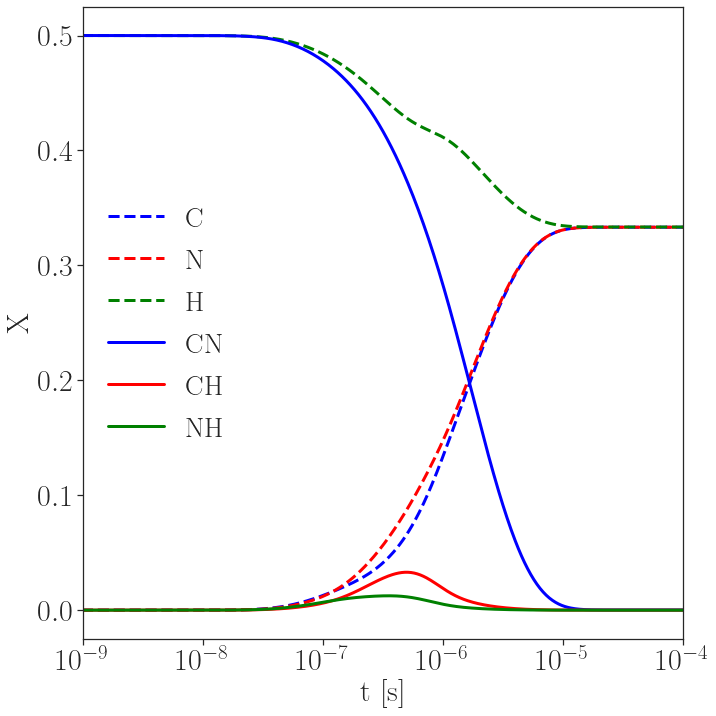

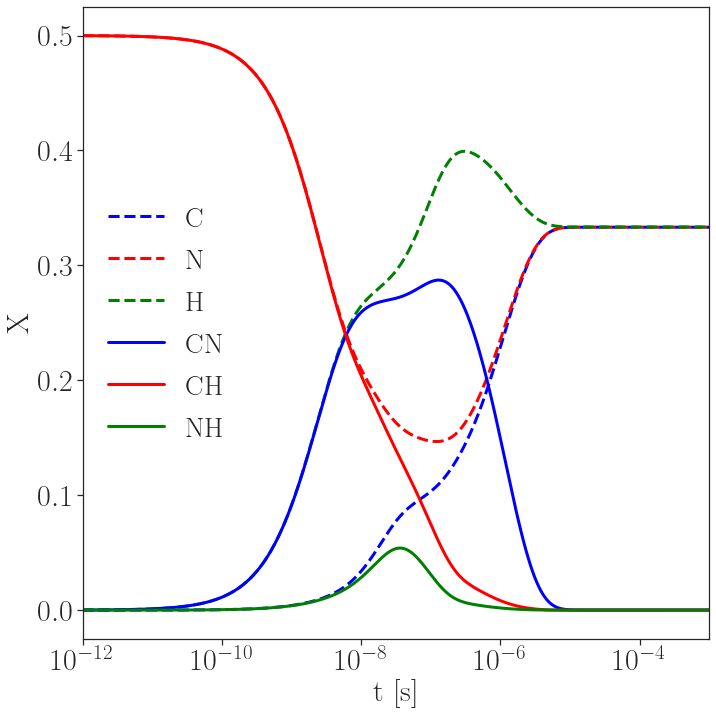

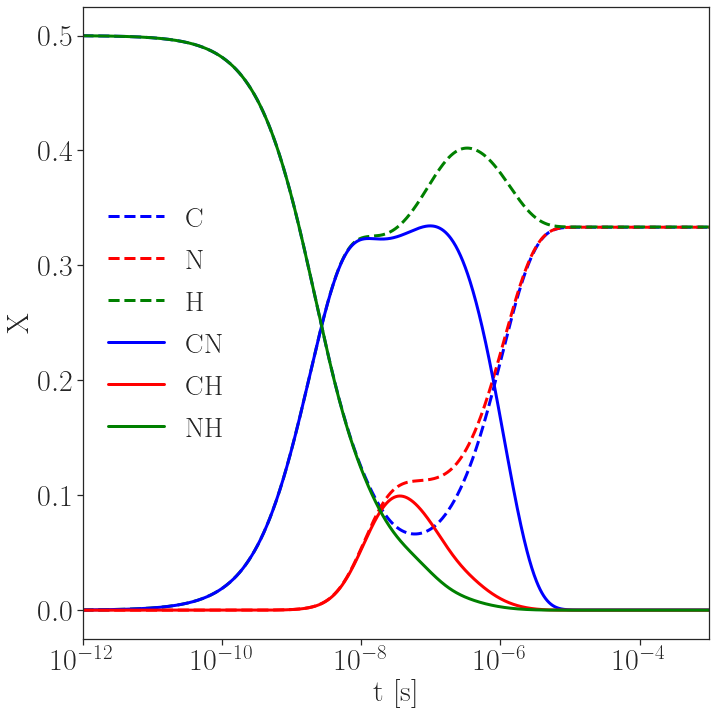

In [8]:
for iTemp in range(1):
    Temp = TempVec[iTemp]
    # CNH
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    plt.plot(CNH[iTemp].time, CNH[iTemp].C, '--b', label='C',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].N, '--r', label='N',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].H, '--g', label='H',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].CN, 'b', label='CN',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].CH, 'r', label='CH',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].NH, 'g', label='NH',linewidth=3)

    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('X')
    plt.xlim([1e-9,1e-4])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)

    # CHN
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    plt.plot(CHN[iTemp].time, CHN[iTemp].C, '--b', label='C',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].N, '--r', label='N',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].H, '--g', label='H',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].CN, 'b', label='CN',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].CH, 'r', label='CH',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].NH, 'g', label='NH',linewidth=3)

    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('X')
    plt.xlim([1e-12,1e-3])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[1]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)

    # HNC
    fig,ax = plt.subplots(1,1,figsize=(10,10))

    plt.plot(HNC[iTemp].time, HNC[iTemp].C, '--b', label='C',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].N, '--r', label='N',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].H, '--g', label='H',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].CN, 'b', label='CN',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].CH, 'r', label='CH',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].NH, 'g', label='NH',linewidth=3)

    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('X')
    plt.xlim([1e-12,1e-3])
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[2]+'_T'+str(Temp)+'K_'+ReactionFlg+'_X.eps'), format='eps', dpi=600)

# CN+H Pop

In [ ]:
# Population plot times
def find_nearest(array, value):
    i = 0
    iStep=[]
    for ivalue in value:
        array = np.asarray(array)
        idx = (np.abs(array - ivalue)).argmin()
        iStep.append(idx)
        i = i+1
    return iStep


iTemp=0
plot_times=[4e-6]
iStepVec = find_nearest(QCT[iTemp].time, plot_times)

for iStep in iStepVec:
    # CNH
    fig,ax = plt.subplots(1,1,figsize=(20,9))

    cmap=mpl.colors.ListedColormap(["k","mediumvioletred","slategray","yellowgreen","sandybrown","sienna","b","c","g","cyan","navy","crimson","limegreen","gold","r","y"])
#     v_color = DiatData[0]['vqn']
#     ecb_color = DiatData[0]['ECB']
    cp = ax.scatter(PopSurQCT[iTemp].Energy[iStep,:], PopQCT[iTemp].Pop_g[iStep,:], c='k')
    cp = ax.scatter(PopSurQCT[iTemp].Energy[iStep,:], PopSurQCT[iTemp].Pop_g[iStep,:], c='r')
    cbar = fig.colorbar(cp)
    cbar.set_label('vqn',fontsize=40,rotation=270,labelpad=50)

#     title='t = '+str(CNH[iTemp].time[iStep])+' s'
    plt.title(title)
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel('$\epsilon$ [eV]')
    plt.ylabel('$N_i/g_i$ [m$^{-3}$]')
    fig.tight_layout(pad=0.5)
#     plt.savefig((Fig_path+System[0]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_'+Molecules[0]+str(iStep)+'.eps'), format='eps', dpi=600)
#     plt.savefig((Fig_path+System[0]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_QSS_ECB.eps'), format='eps', dpi=600)


# CH+N Pop

No handles with labels found to put in legend.


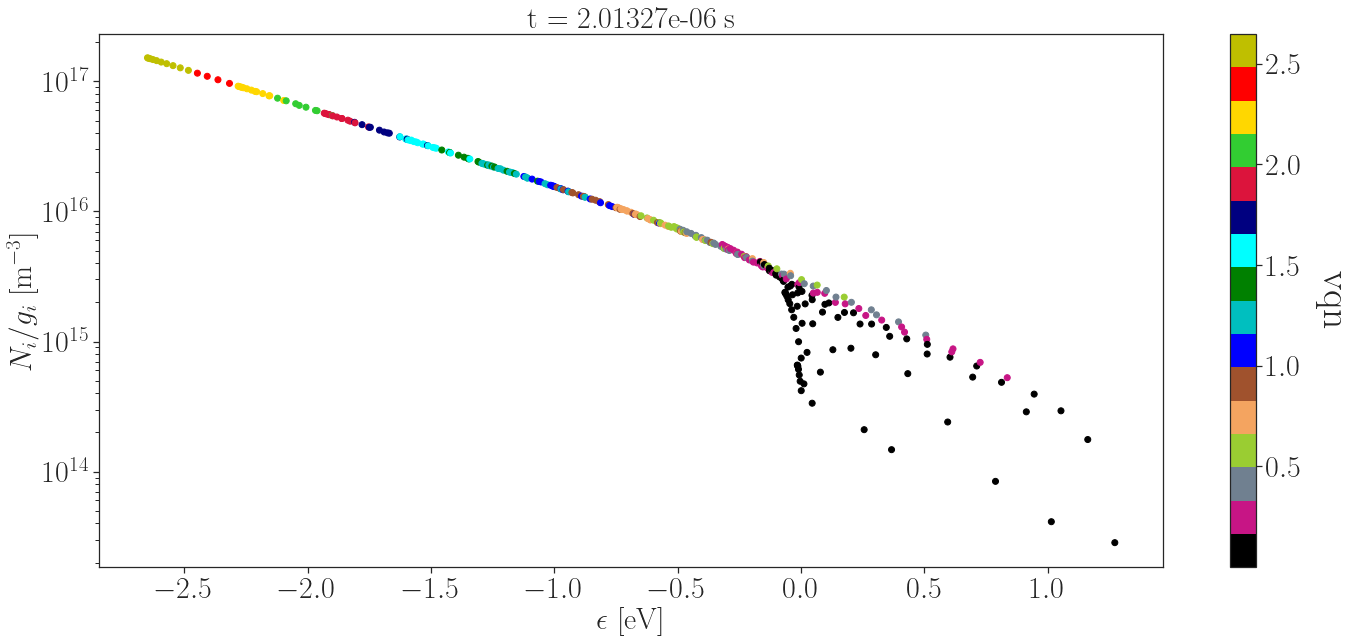

In [41]:
iTemp=0
plot_times=[2e-6]
iStepVec = find_nearest(CHN[iTemp].time, plot_times)

for iStep in iStepVec:
    
    # CHN
    fig,ax = plt.subplots(1,1,figsize=(20,9))
    
    cmap=mpl.colors.ListedColormap(["k","mediumvioletred","slategray","yellowgreen","sandybrown","sienna","b","c","g","cyan","navy","crimson","limegreen","gold","r","y"])
    v_color = DiatData[1]['vqn']
    ecb_color = DiatData[1]['ECB']
    cp = ax.scatter(DiatData[1]['EInt'], CHNPop[iTemp].CHPop_g[iStep,:], c=(ecb_color),cmap=cmap)
    cbar = fig.colorbar(cp)
    cbar.set_label('vqn',fontsize=40,rotation=270,labelpad=50)

    title='t = '+str(CHN[iTemp].time[iStep])+' s'
    plt.title(title)
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel('$\epsilon$ [eV]')
    plt.ylabel('$N_i/g_i$ [m$^{-3}$]')
    fig.tight_layout(pad=0.5)
#     plt.savefig((Fig_path+System[1]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_'+Molecules[1]+str(iStep)+'.eps'), format='eps', dpi=600)
    plt.savefig((Fig_path+System[1]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_QSS_ECB.eps'), format='eps', dpi=600)


# HN+C Pop

No handles with labels found to put in legend.


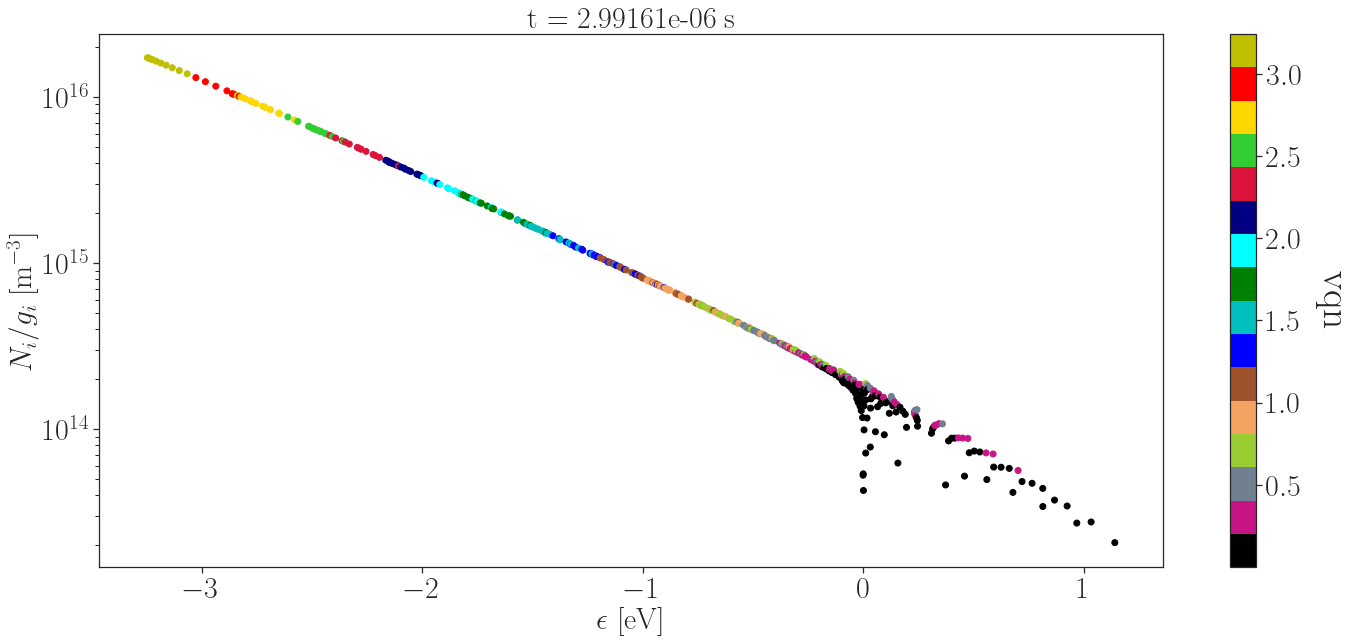

In [43]:
iTemp=0
plot_times=[3e-6]
iStepVec = find_nearest(HNC[iTemp].time, plot_times)

for iStep in iStepVec:

    # HNC
    fig,ax = plt.subplots(1,1,figsize=(20,9))

    cmap=mpl.colors.ListedColormap(["k","mediumvioletred","slategray","yellowgreen","sandybrown","sienna","b","c","g","cyan","navy","crimson","limegreen","gold","r","y"])
    v_color = DiatData[2]['vqn']
    ecb_color = DiatData[2]['ECB']
    cp = ax.scatter(DiatData[2]['EInt'], HNCPop[iTemp].HNPop_g[iStep,:], c=(ecb_color),cmap=cmap)
    cbar = fig.colorbar(cp)
    cbar.set_label('vqn',fontsize=40,rotation=270,labelpad=50)
    #cbar.set_label('$\\Delta\\epsilon_{CB}$ [eV]',fontsize=40,rotation=270,labelpad=50)
    
    title='t = '+str(HNC[iTemp].time[iStep])+' s'
    plt.title(title)
    plt.legend(frameon=False)
    plt.yscale('log')
    plt.xlabel('$\epsilon$ [eV]')
    plt.ylabel('$N_i/g_i$ [m$^{-3}$]')
    fig.tight_layout(pad=0.5)
#     plt.savefig((Fig_path+System[2]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_'+Molecules[2]+str(iStep)+'_vqnCBar.eps'), format='eps', dpi=600)
    plt.savefig((Fig_path+System[2]+'_T'+str(TempVec[iTemp])+'K_'+ReactionFlg+'_pop_QSS_ECB.eps'), format='eps', dpi=600)


# Compute and Plot Global Energy

In [23]:
def compute_energy(Pop_g,Mol,time):
    # Energy computation
    NSteps = np.size(time)
    eRot=np.zeros(NSteps)
    eVib=np.zeros(NSteps)
    iMol=Molecules.index(Mol)
    
    for iStep in range(0,NSteps):
        Ni = Pop_g[iStep,:]*DiatData[iMol]['g']
        NiTot = np.sum(Ni)   
        eRot[iStep] = sum( DiatData[iMol]['ERot']*Ni ) #/ NiTot
        eVib[iStep] = sum( DiatData[iMol]['EVibv0Ref']*Ni ) #/ NiTot
    
    return eRot, eVib

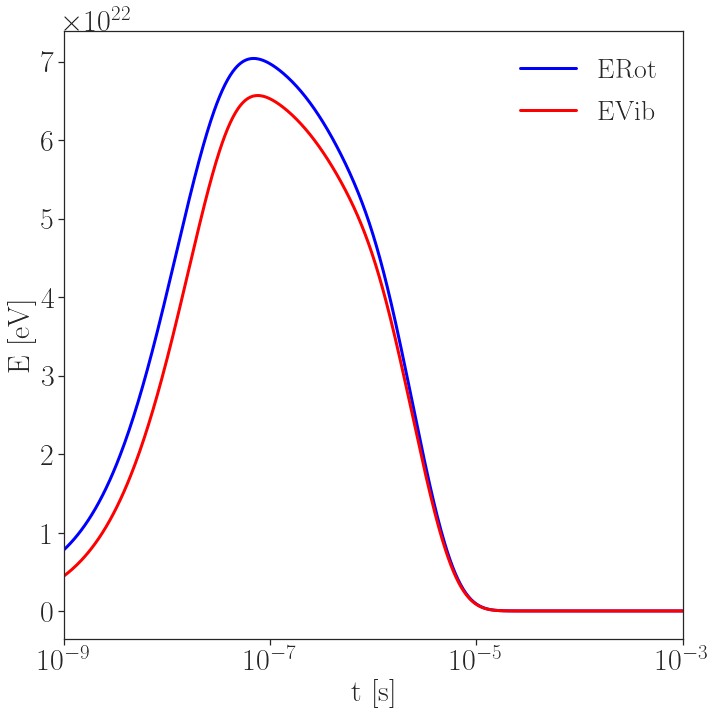

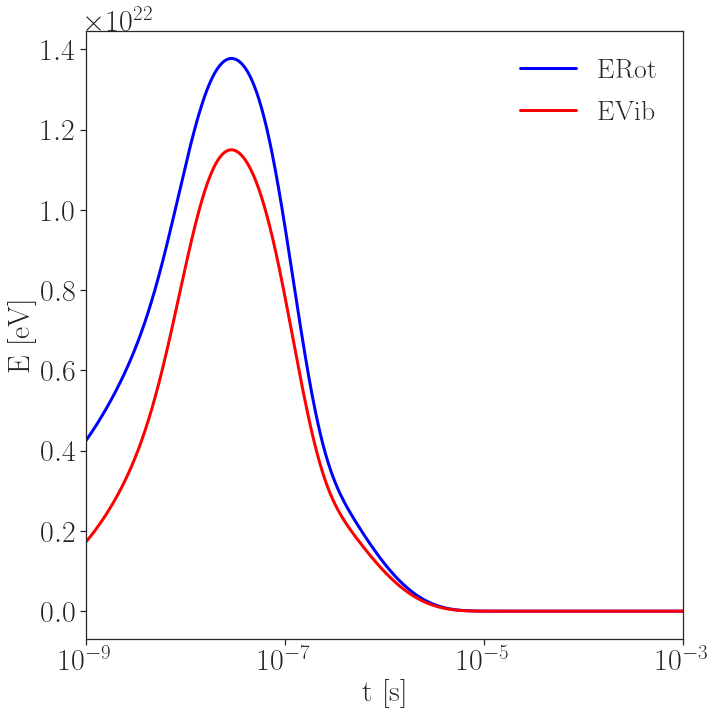

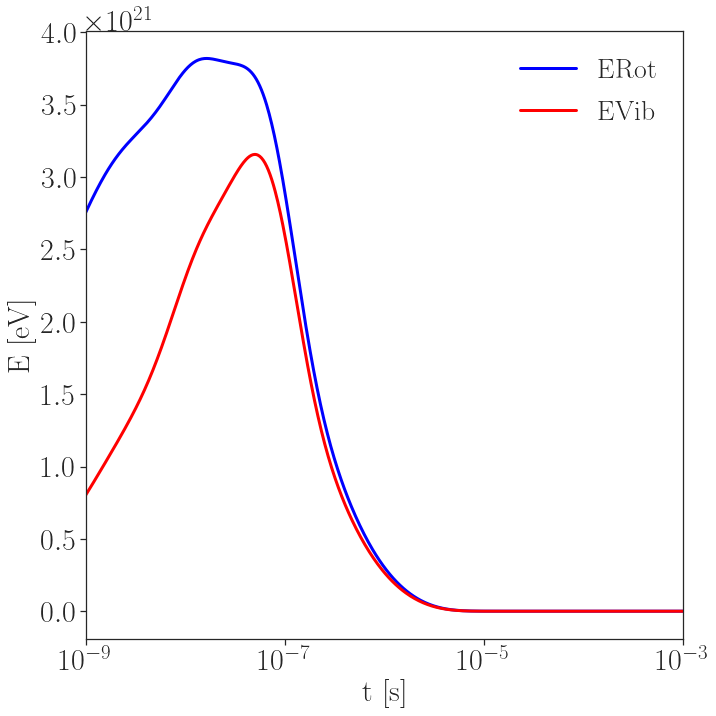

In [24]:
for iTemp in range(len(TempVec)):
    Temp = TempVec[iTemp]
    # CNH
    Molecule='CN'
    CNH[iTemp]['eRot'],CNH[iTemp]['eVib']=compute_energy(CNHPop[iTemp].CNPop_g,Molecule,CNH[iTemp].time)
    # CHN
    Molecule='CH'
    CHN[iTemp]['eRot'],CHN[iTemp]['eVib']=compute_energy(CHNPop[iTemp].CHPop_g,Molecule,CHN[iTemp].time)
    # HNC
    Molecule='HN'
    HNC[iTemp]['eRot'],HNC[iTemp]['eVib']=compute_energy(HNCPop[iTemp].HNPop_g,Molecule,HNC[iTemp].time)

    # CNH
    fig = plt.figure(figsize=(10,10))
    plt.plot(CNH[iTemp].time, CNH[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-9,1e-3])
#     plt.ylim([0.8,0.95])
    fig.tight_layout(pad=0.5)
    
    # CHN
    fig = plt.figure(figsize=(10,10))
    plt.plot(CHN[iTemp].time, CHN[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-9,1e-3])
#     plt.ylim([0.5,0.82])
    fig.tight_layout(pad=0.5)

    # HNC
    fig = plt.figure(figsize=(10,10))
    plt.plot(HNC[iTemp].time, HNC[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-9,1e-3])
#     plt.ylim([0.5,0.85])
    fig.tight_layout(pad=0.5)

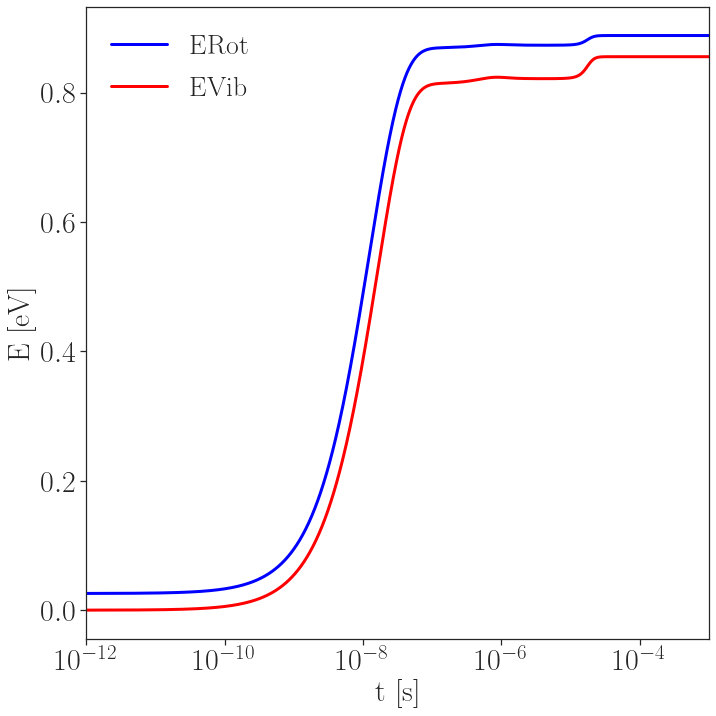

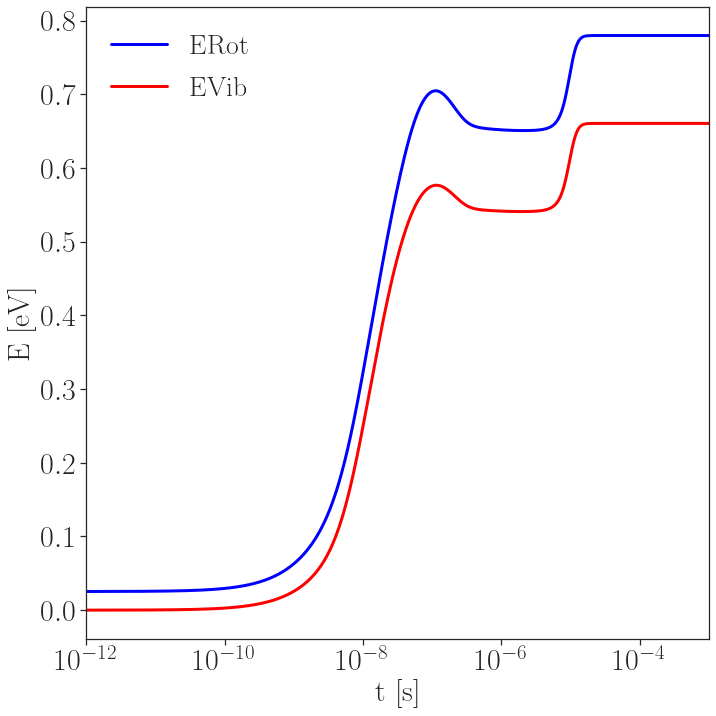

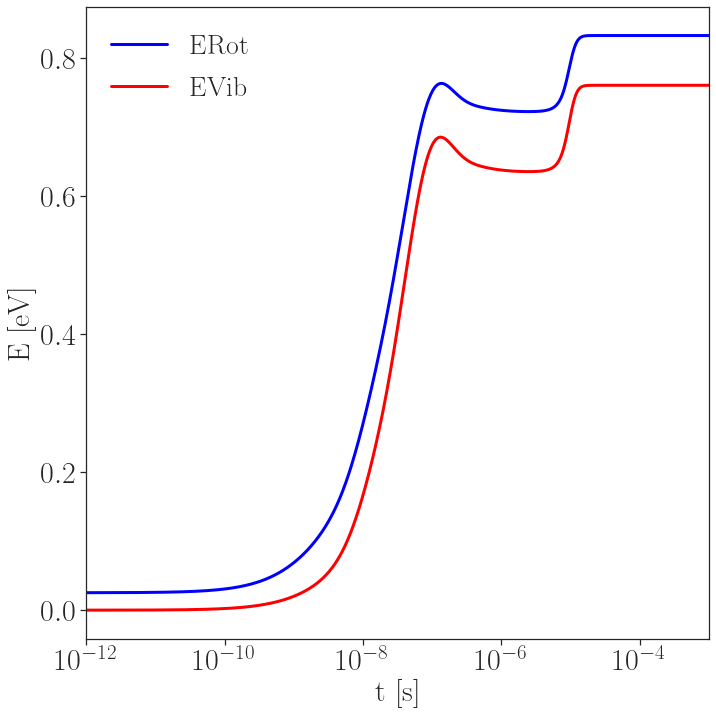

In [10]:
for iTemp in range(len(TempVec)):
    Temp = TempVec[iTemp]
    # CNH
    Molecule='CN'
    CNH[iTemp]['eRot'],CNH[iTemp]['eVib']=compute_energy(CNHPop[iTemp].CNPop_g,Molecule,CNH[iTemp].time)
    # CHN
    Molecule='CH'
    CHN[iTemp]['eRot'],CHN[iTemp]['eVib']=compute_energy(CHNPop[iTemp].CHPop_g,Molecule,CHN[iTemp].time)
    # HNC
    Molecule='HN'
    HNC[iTemp]['eRot'],HNC[iTemp]['eVib']=compute_energy(HNCPop[iTemp].HNPop_g,Molecule,HNC[iTemp].time)
    
    # CNH
    fig = plt.figure(figsize=(10,10))
    plt.plot(CNH[iTemp].time, CNH[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(CNH[iTemp].time, CNH[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-12,1e-3])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)

    # CHN
    fig = plt.figure(figsize=(10,10))
    plt.plot(CHN[iTemp].time, CHN[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(CHN[iTemp].time, CHN[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-12,1e-3])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[1]+'_T'+str(Temp)+'K_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)
    
    # HNC
    fig = plt.figure(figsize=(10,10))
    plt.plot(HNC[iTemp].time, HNC[iTemp].eRot, '-b', label='ERot',linewidth=3)
    plt.plot(HNC[iTemp].time, HNC[iTemp].eVib, '-r', label='EVib',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('E [eV]')
    plt.xlim([1e-12,1e-3])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[2]+'_T'+str(Temp)+'K_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)

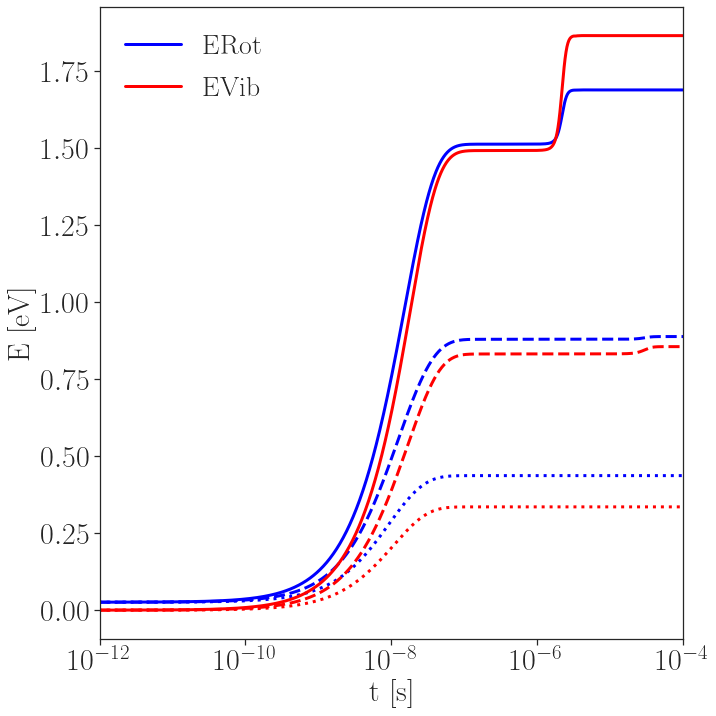

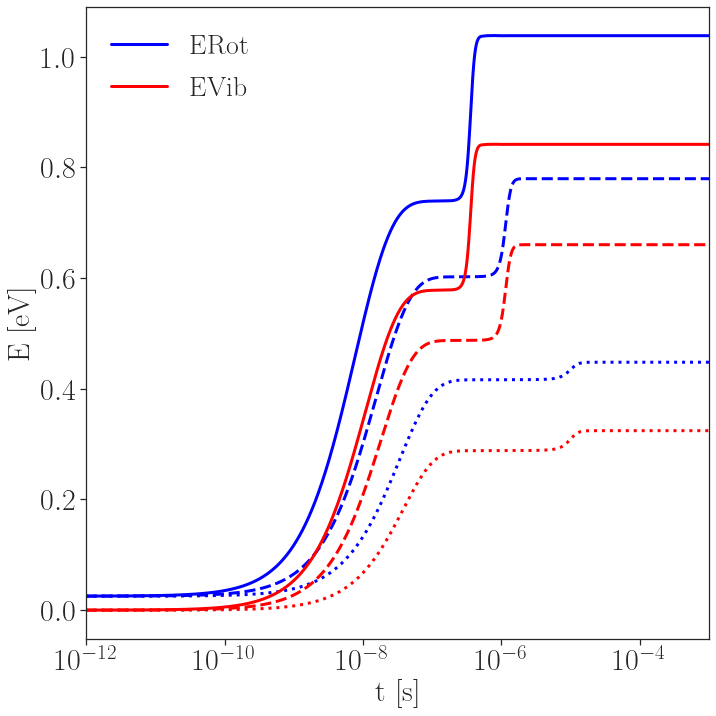

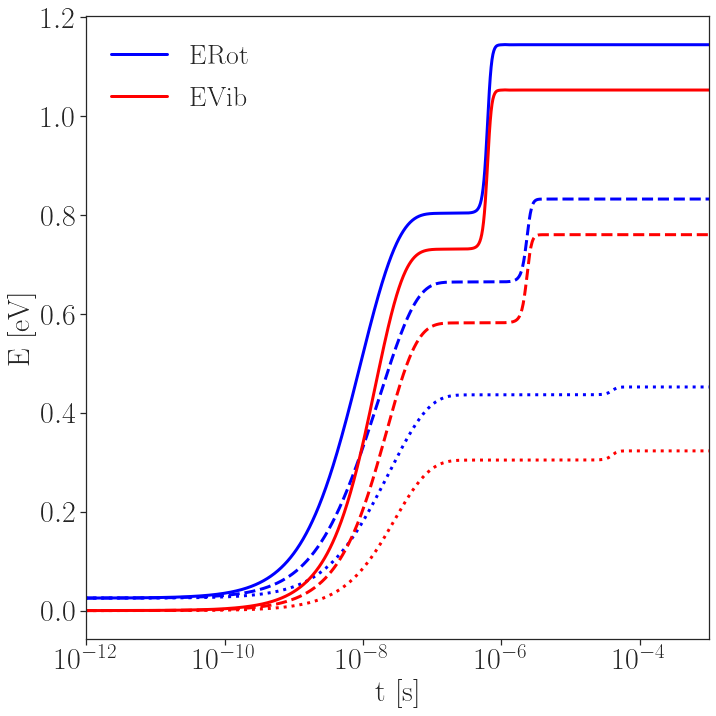

In [14]:
# CNH
fig = plt.figure(figsize=(10,10))

plt.plot(CNH[0].time, CNH[0].eRot, ':b', label=None,linewidth=3)
plt.plot(CNH[0].time, CNH[0].eVib, ':r', label=None,linewidth=3)
plt.plot(CNH[1].time, CNH[1].eRot, '--b', label=None,linewidth=3)
plt.plot(CNH[1].time, CNH[1].eVib, '--r', label=None,linewidth=3)
plt.plot(CNH[2].time, CNH[2].eRot, '-b', label='ERot',linewidth=3)
plt.plot(CNH[2].time, CNH[2].eVib, '-r', label='EVib',linewidth=3)

plt.legend(frameon=False)
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel('E [eV]')
plt.xlim([1e-12,1e-4])
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[0]+'_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)

# CNH
fig = plt.figure(figsize=(10,10))

plt.plot(CHN[0].time, CHN[0].eRot, ':b', label=None,linewidth=3)
plt.plot(CHN[0].time, CHN[0].eVib, ':r', label=None,linewidth=3)
plt.plot(CHN[1].time, CHN[1].eRot, '--b', label=None,linewidth=3)
plt.plot(CHN[1].time, CHN[1].eVib, '--r', label=None,linewidth=3)
plt.plot(CHN[2].time, CHN[2].eRot, '-b', label='ERot',linewidth=3)
plt.plot(CHN[2].time, CHN[2].eVib, '-r', label='EVib',linewidth=3)

plt.legend(frameon=False)
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel('E [eV]')
plt.xlim([1e-12,1e-3])
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[1]+'_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)

# HNC
fig = plt.figure(figsize=(10,10))

plt.plot(HNC[0].time, HNC[0].eRot, ':b', label=None,linewidth=3)
plt.plot(HNC[0].time, HNC[0].eVib, ':r', label=None,linewidth=3)
plt.plot(HNC[1].time, HNC[1].eRot, '--b', label=None,linewidth=3)
plt.plot(HNC[1].time, HNC[1].eVib, '--r', label=None,linewidth=3)
plt.plot(HNC[2].time, HNC[2].eRot, '-b', label='ERot',linewidth=3)
plt.plot(HNC[2].time, HNC[2].eVib, '-r', label='EVib',linewidth=3)

plt.legend(frameon=False)
plt.xscale('log')
plt.xlabel('t [s]')
plt.ylabel('E [eV]')
plt.xlim([1e-12,1e-3])
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[2]+'_'+ReactionFlg+'_Energy.eps'), format='eps', dpi=600)

In [19]:
def compute_GlobalRates(Pop_g,KDiss,Mol,time):
    # Energy computation
    NSteps = np.size(time)
    KDGlobal=np.zeros(NSteps)
    iMol=Molecules.index(Mol)
    
    for iStep in range(0,NSteps):
        Ni = Pop_g[iStep,:]*DiatData[iMol]['g']
        NiTot = np.sum(Ni)
        KDGlobal[iStep] = sum( KDiss*Ni )/NiTot
    
    return KDGlobal    

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


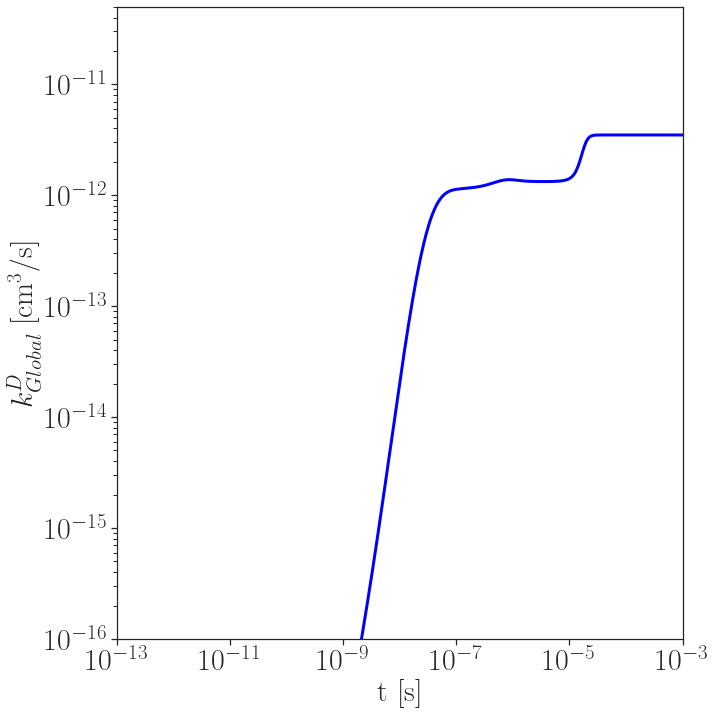

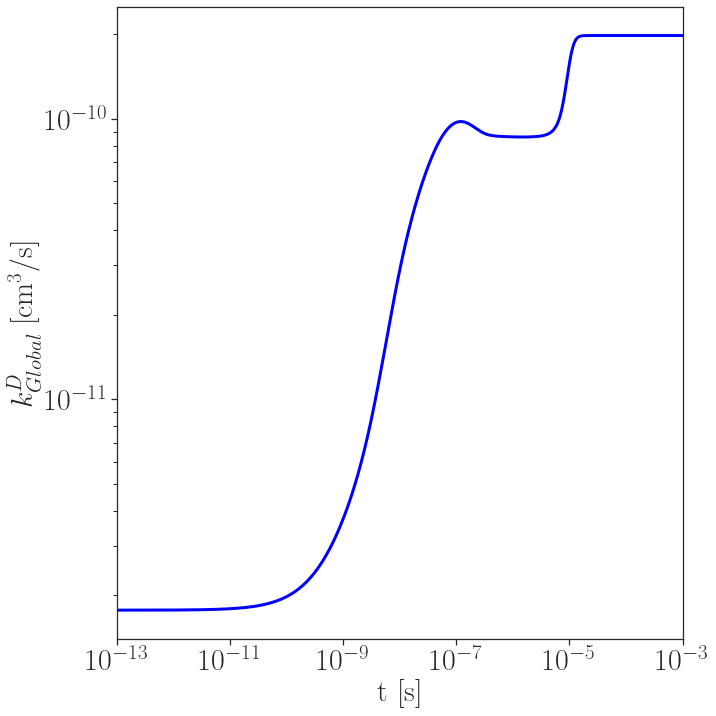

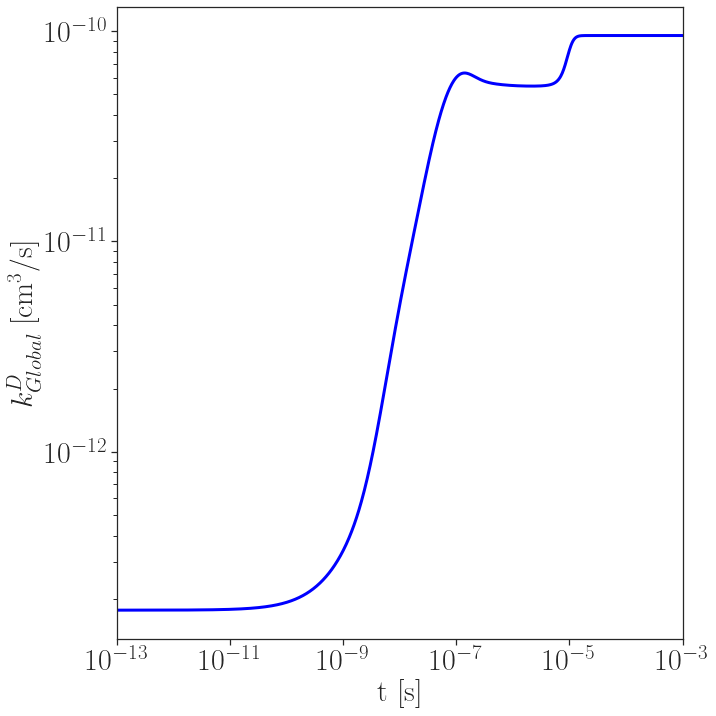

In [20]:
for iTemp in range(len(TempVec)):
    Temp = TempVec[iTemp]
    # CNH
    Molecule='CN'
    CNH[iTemp]['KDGlobal']=compute_GlobalRates(CNHPop[iTemp].CNPop_g,KDissCNH[:,0],Molecule,CNH[iTemp].time)
    # CHN
    Molecule='CH'
    CHN[iTemp]['KDGlobal']=compute_GlobalRates(CHNPop[iTemp].CHPop_g,KDissCHN[:,0],Molecule,CHN[iTemp].time)
    # HNC
    Molecule='HN'
    HNC[iTemp]['KDGlobal']=compute_GlobalRates(HNCPop[iTemp].HNPop_g,KDissHNC[:,0],Molecule,HNC[iTemp].time)
    
    # CNH
    fig = plt.figure(figsize=(10,10))
    plt.plot(CNH[iTemp].time, CNH[iTemp].KDGlobal, '-b',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('$k^D_{Global}$ [cm$^3$/s]')
    plt.xlim([1e-13,1e-3])
    plt.ylim([1e-16,5e-11])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_KDissGlobal.eps'), format='eps', dpi=600)

    # CHN
    fig = plt.figure(figsize=(10,10))
    plt.plot(CHN[iTemp].time, CHN[iTemp].KDGlobal, '-b',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('$k^D_{Global}$ [cm$^3$/s]')
    plt.xlim([1e-13,1e-3])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_KDissGlobal.eps'), format='eps', dpi=600)
    
    # HNC
    fig = plt.figure(figsize=(10,10))
    plt.plot(HNC[iTemp].time, HNC[iTemp].KDGlobal, '-b',linewidth=3)
    plt.legend(frameon=False)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('t [s]')
    plt.ylabel('$k^D_{Global}$ [cm$^3$/s]')
    plt.xlim([1e-13,1e-3])
    fig.tight_layout(pad=0.5)
    plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_'+ReactionFlg+'_KDissGlobal.eps'), format='eps', dpi=600)

# Plot Dissociation Rates

In [6]:
Temp=10000
# Read Rates
PathToHDF5Fld = ablation0D_path+'../../Ablation_Database/HDF5_Database/'
PathToHDF5File = PathToHDF5Fld+System[0]+'.hdf5'
KDissCNH, KInelMatCNH, KExchMatCNH = read_Rates(PathToHDF5File, Temp, Temp, 4)

PathToHDF5File = PathToHDF5Fld+System[1]+'.hdf5'
KDissCHN, KInelMatCHN, KExchMatCHN = read_Rates(PathToHDF5File, Temp, Temp, 4)

PathToHDF5File = PathToHDF5Fld+System[2]+'.hdf5'
KDissHNC, KInelMatHNC, KExchMatHNC = read_Rates(PathToHDF5File, Temp, Temp, 4)

[HCN]:   Reading Rates Data from: /home/maitreyee/WORKSPACE/Ablation_Database/Run_0D/../../Ablation_Database/HDF5_Database/CNH_UIUC.hdf5
[HCN]:   Reading Rates Data from: /home/maitreyee/WORKSPACE/Ablation_Database/Run_0D/../../Ablation_Database/HDF5_Database/CHN_UIUC.hdf5
[HCN]:   Reading Rates Data from: /home/maitreyee/WORKSPACE/Ablation_Database/Run_0D/../../Ablation_Database/HDF5_Database/HNC_UIUC.hdf5


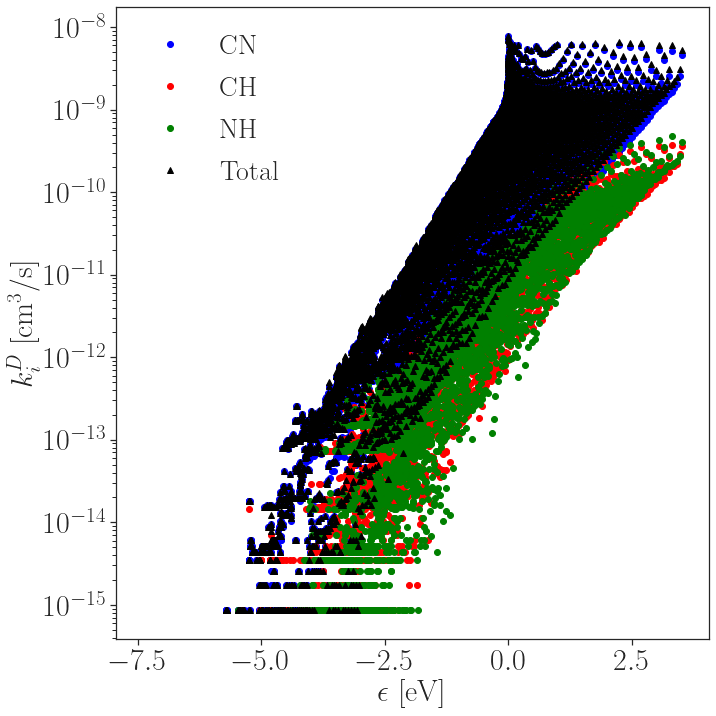

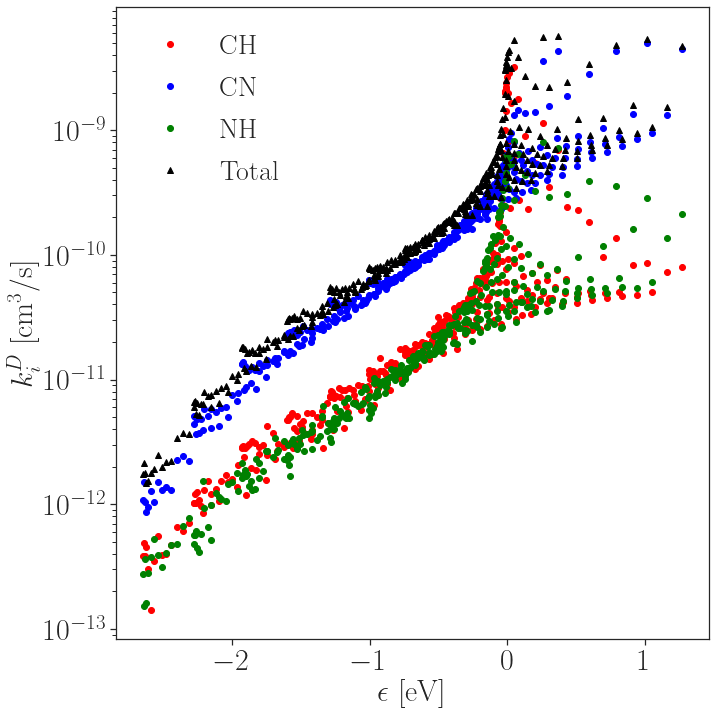

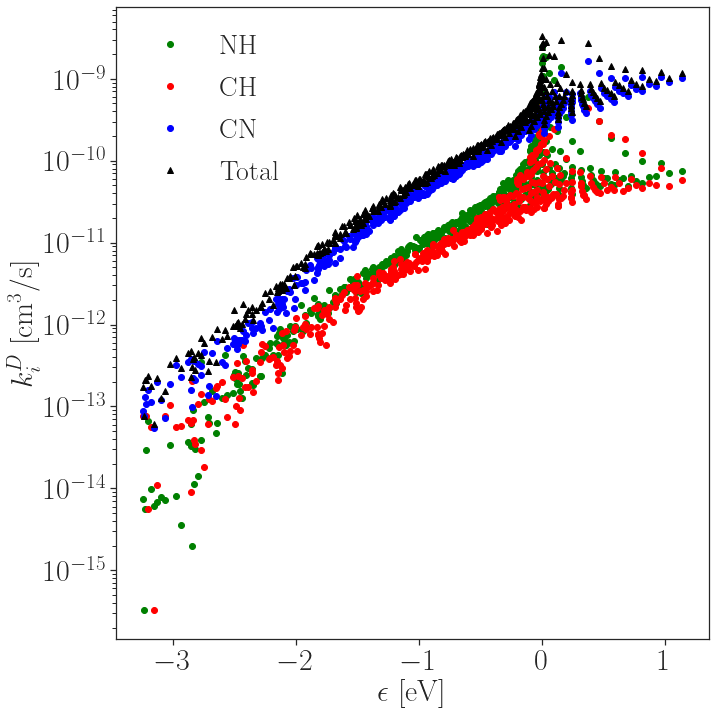

In [8]:
# CNH
fig,ax = plt.subplots(1,1,figsize=(10,10))

cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c","g","cyan"])
plt.plot(DiatData[0]['EInt'], KDissCNH[:,1],'bo',label='CN')
plt.plot(DiatData[0]['EInt'], KDissCNH[:,2],'ro',label='CH')
plt.plot(DiatData[0]['EInt'], KDissCNH[:,3],'go',label='NH')
plt.plot(DiatData[0]['EInt'], KDissCNH[:,0],'k^',label='Total')

plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel('$\epsilon$ [eV]')
plt.ylabel('$k^D_{i}$ [cm$^3$/s]')
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[0]+'_T'+str(Temp)+'K_KDiss_withTot.eps'), format='eps', dpi=600)

# CHN
fig,ax = plt.subplots(1,1,figsize=(10,10))

cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c","g","cyan"])
plt.plot(DiatData[1]['EInt'], KDissCHN[:,1],'ro',label='CH')
plt.plot(DiatData[1]['EInt'], KDissCHN[:,2],'bo',label='CN')
plt.plot(DiatData[1]['EInt'], KDissCHN[:,3],'go',label='NH')
plt.plot(DiatData[1]['EInt'], KDissCHN[:,0],'k^',label='Total')

plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel('$\epsilon$ [eV]')
plt.ylabel('$k^D_{i}$ [cm$^3$/s]')
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[1]+'_T'+str(Temp)+'K_KDiss_withTot.eps'), format='eps', dpi=600)

# HNC
fig,ax = plt.subplots(1,1,figsize=(10,10))

cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c","g","cyan"])
plt.plot(DiatData[2]['EInt'], KDissHNC[:,1],'go',label='NH')
plt.plot(DiatData[2]['EInt'], KDissHNC[:,2],'ro',label='CH')
plt.plot(DiatData[2]['EInt'], KDissHNC[:,3],'bo',label='CN')
plt.plot(DiatData[2]['EInt'], KDissHNC[:,0],'k^',label='Total')

plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel('$\epsilon$ [eV]')
plt.ylabel('$k^D_{i}$ [cm$^3$/s]')
fig.tight_layout(pad=0.5)
plt.savefig((Fig_path+System[2]+'_T'+str(Temp)+'K_KDiss_withTot.eps'), format='eps', dpi=600)

# Dissociation source term contributions

In [97]:
def diss_srcterm(kdiss,pop):
    
    src_term = np.zeros(3)
    src_term[0] = sum(kdiss[:,1]*pop)
    src_term[1] = sum(kdiss[:,2]*pop)
    src_term[2] = sum(kdiss[:,3]*pop)
    print(src_term)
    print(sum(src_term))
    direct_diss_perc = src_term[0]/(sum(src_term))
    exch_contr_perc = 1.0 - direct_diss_perc
    print(exch_contr_perc)
    
    return src_term, direct_diss_perc, exch_contr_perc

In [100]:
# Computing source terms

# CHN
plot_times=[1e-6]
iStepVec1 = find_nearest(CHN[iTemp].time, plot_times)
popCH = CHNPop[iTemp].CHPop_g[732,:]*DiatData[1]['g']
srcterm_CHN,DD_CHN,ED_CHN = diss_srcterm(KDissCHN,popCH)

# HNC
plot_times=[1e-6]
iStepVec2 = find_nearest(HNC[iTemp].time, plot_times)
popHN = HNCPop[iTemp].HNPop_g[732,:]*DiatData[2]['g']
srcterm_HNC,DD_HNC,ED_HNC  = diss_srcterm(KDissHNC,popHN)

[1.17679601e+10 5.60446528e+10 9.16322649e+09]
76975839443.36972
0.847121379869408
[4.20719230e+10 2.49815859e+10 1.74664155e+11]
241717664382.84753
0.8259460138239827


In [101]:
iStepVec2

[732]

In [77]:
src_term[2]=sum(popCH*KDissCHN[:,2])

In [78]:
src_term[0]=sum(popCH*KDissCHN[:,0])

In [89]:
sum(popCH*KDissCHN[:,1])+sum(popCH*KDissCHN[:,2])+sum(popCH*KDissCHN[:,3])

76975839443.36972

No handles with labels found to put in legend.


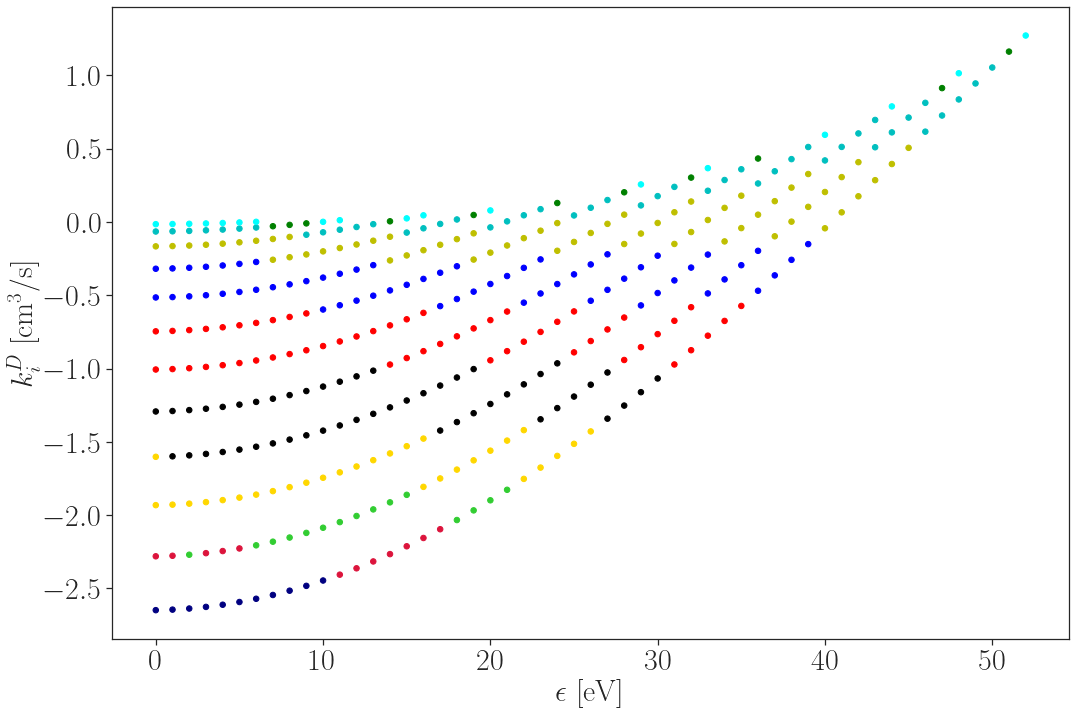

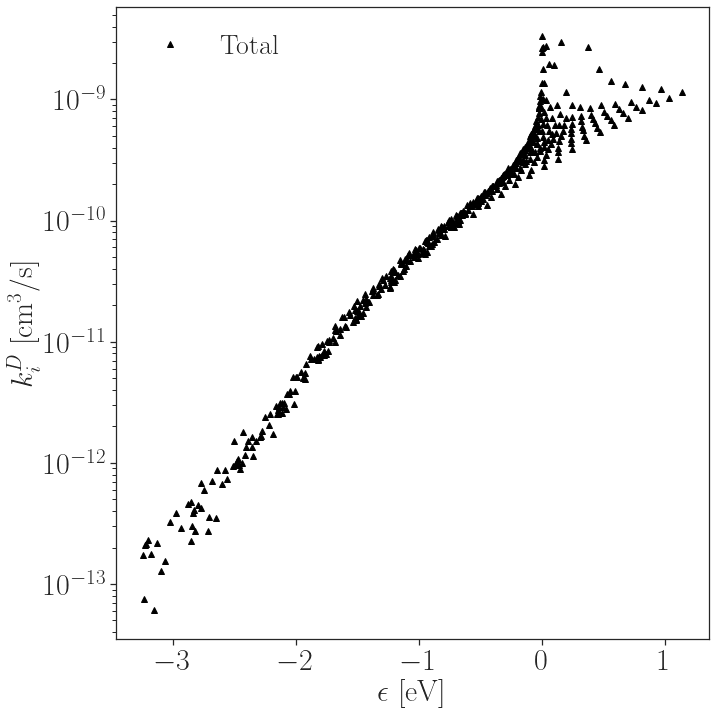

In [21]:
# CHN
fig,ax = plt.subplots(1,1,figsize=(15,10))

ecb_color=DiatData[1]['ECB']
kdiss_color=np.log(KDissCHN[:,0])
cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c","g","cyan"])

plt.scatter(DiatData[1]['jqn'],DiatData[1]['EInt'], c=(kdiss_color),cmap=cmap,s=30)

plt.legend(frameon=False)
plt.xlabel('$\epsilon$ [eV]')
plt.ylabel('$k^D_{i}$ [cm$^3$/s]')
fig.tight_layout(pad=0.5)

# HNC
fig,ax = plt.subplots(1,1,figsize=(10,10))

cmap=mpl.colors.ListedColormap(["navy","crimson","limegreen","gold","k","r","b","y","c","g","cyan"])
plt.plot(DiatData[2]['EInt'], KDissHNC[:,0],'k^',label='Total')

plt.legend(frameon=False)
plt.yscale('log')
plt.xlabel('$\epsilon$ [eV]')
plt.ylabel('$k^D_{i}$ [cm$^3$/s]')
fig.tight_layout(pad=0.5)

In [91]:
sum(popCH*KDissCHN[:,3])/sum(popCH*KDissCHN[:,0])

0.1190402930990926

In [92]:
sum(popCH*KDissCHN[:,1])/sum(popCH*KDissCHN[:,0])

0.1528786201305919

In [87]:
sum(popCH*KDissCHN[:,0])

76975839443.36975

In [45]:
src_term

array([0., 0., 0.])

In [47]:
src_term[2]=sum(popCH*KDissCHN[:,2])

In [57]:
1.0-0.5316434989708592

0.46835650102914084